# Modeling 

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve

In [78]:
import os 
import sys
sys.path.append(os.path.join(os.path.abspath('..')))

In [79]:
import src.data_loading as dl
import scripts.feature_enigneering as fe

In [80]:
output_data = '../data/cleaned'
df = pd.read_csv(output_data + '/cleaned_data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Stability_Score,RFMS_Score,RFMS_Class,Risk_Label,Recency_WoE,Frequency_WoE,Monetary_WoE,Stability_WoE,predicted_prob,predicted_label
0,76871,36123,3957,649,2991,0,0,5,9,0,...,0,0.50,0.0,0,12.501993,13.489380,12.390767,12.390767,1.114100e-04,0
1,73770,15642,4841,2867,2991,0,0,3,5,2,...,0,0.50,0.0,0,12.501993,13.489380,12.390767,12.390767,1.114100e-04,0
2,26203,53941,4229,155,3195,0,0,5,0,0,...,1,0.75,0.0,0,-0.654791,-1.608747,13.104705,-1.574980,1.491724e-07,0
3,380,102363,648,1611,488,0,0,0,18,8,...,0,0.50,0.0,0,13.148978,13.040990,11.249230,11.249230,1.512357e-04,0
4,28195,38780,4841,2867,488,0,0,3,5,2,...,0,0.50,0.0,0,13.148978,13.040990,11.249230,11.249230,1.512357e-04,0


### 1. Split the data into training and testing sets:

In [81]:
rfms_features = ['Recency', 'Frequency', 'Monetary', 'Stability']
# Features (X) and Target (y)
X = df[[feature + '_WoE' for feature in rfms_features]]
y = df['FraudResult']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 76529 samples
Testing set: 19133 samples


### 2. Train the models:

In [82]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [83]:
# Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
# GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [60]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 157, number of negative: 76372
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 76529, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002052 -> initscore=-6.187126
[LightGBM] [Info] Start training from score -6.187126


LGBMClassifier(random_state=42)

### 3. Hyperparameter tuning: I'll use Grid Search for hyperparameter tuning.

In [61]:
# Logistic Regression
param_grid_lr = {'C': [0.1, 1, 10]}
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

# Decision Trees
param_grid_dt = {'max_depth': [3, 5, 10]}
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

# Random Forest
param_grid_rf = {'max_depth': [3, 5, 10], 'n_estimators': [50, 100, 200]}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# GradientBoostingClassifier
param_grid_gbm = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
grid_search_gbm = GridSearchCV(gbm_model, param_grid_gbm, cv=5)
grid_search_gbm.fit(X_train, y_train)

# LGBMClassifier
param_grid_lgbm = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200], 'num_leaves': [31, 50, 100]}
grid_search_lgbm = GridSearchCV(lgbm_model, param_grid_lgbm, cv=5)
grid_search_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 126, number of negative: 61097
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 61223, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002058 -> initscore=-6.183936
[LightGBM] [Info] Start training from score -6.183936
[LightGBM] [Info] Number of positive: 126, number of negative: 61097
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 61223, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002058 -> initscore=-6.183936
[LightGBM]

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [31, 50, 100]})

### 4. Model evaluation: I'll use Accuracy, Precision, Recall, F1 Score, and ROC-AUC to evaluate the models.

Logistic Regression

In [67]:
# Logistic Regression
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.9983797627136362
Precision: 0.7272727272727273
Recall: 0.2222222222222222
F1 Score: 0.3404255319148936
ROC-AUC: 0.6110325647425716


Decision Trees

In [68]:
# Decision Trees
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)
print("Decision Trees:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_dt))

Decision Trees:
Accuracy: 0.9984320284325511
Precision: 0.7142857142857143
Recall: 0.2777777777777778
F1 Score: 0.4
ROC-AUC: 0.6387841603975027


Random Forest

In [69]:
# Random Forest
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.998641091308211
Precision: 0.6666666666666666
Recall: 0.5555555555555556
F1 Score: 0.6060606060606061
ROC-AUC: 0.7775159565493126


GradientBoostingClassifier

In [73]:
# GradientBoostingClassifier
y_pred_gbm = grid_search_gbm.best_estimator_.predict(X_test)
print("Gradient Boost:")
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))
print("Precision:", precision_score(y_test, y_pred_gbm))
print("Recall:", recall_score(y_test, y_pred_gbm))
print("F1 Score:", f1_score(y_test, y_pred_gbm))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_gbm))

Gradient Boost:
Accuracy: 0.9986933570271259
Precision: 0.9230769230769231
Recall: 0.3333333333333333
F1 Score: 0.4897959183673469
ROC-AUC: 0.6666404845438201


LGBMClassifier

In [74]:
# LGBMClassifier
y_pred_lgbm = grid_search_lgbm.best_estimator_.predict(X_test)
print("LGBMClassifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Precision:", precision_score(y_test, y_pred_lgbm))
print("Recall:", recall_score(y_test, y_pred_lgbm))
print("F1 Score:", f1_score(y_test, y_pred_lgbm))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lgbm))

LGBMClassifier:
Accuracy: 0.998536559870381
Precision: 0.6538461538461539
Recall: 0.4722222222222222
F1 Score: 0.5483870967741935
ROC-AUC: 0.7358754720054925


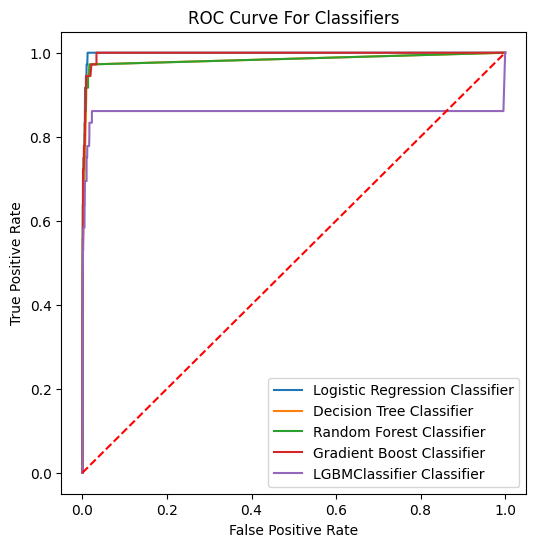

In [75]:
# Define models
models = {
    'Logistic Regression': grid_search_lr.best_estimator_,
    'Decision Tree': grid_search_dt.best_estimator_,
    'Random Forest': grid_search_rf.best_estimator_,
    'Gradient Boost': grid_search_gbm.best_estimator_,
    'LGBMClassifier': grid_search_lgbm.best_estimator_
}

# Function to plot ROC curves
def plot_roc_curves(X_test, y_test, models):
    plt.figure(figsize=(6,6))  # Create a single figure

    for model_name, clf in models.items():
        # Classifier predictions
        y_pred_proba = clf.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'{model_name} Classifier')

    # Plot the diagonal line
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')

    # Add label and title 
    plt.title("ROC Curve For Classifiers")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# Plot ROC curves
plot_roc_curves(X_test, y_test, models)

In [76]:
# Save the model
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(grid_search_rf.best_estimator_, f)

## Task 5 - Model Serving API Call